In [1]:
library(reshape2)
library(ggplot2)
require(PRROC)
library(plyr)
df1 = data.frame(read.table('predictions.annotated.K562.CTCF.sorted'))
df1 = df1[df1$V28==0,]
df2 = data.frame(read.table('predictions.annotated.K562.CTCF_LE0.174.sorted'))
df2 = df2[df2$V28==0,]

Loading required package: PRROC



In [12]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=24, face="bold",hjust = 0.5),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 22,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 22),
  legend.text = element_text(size = 20),
  legend.position = c(.5, .95),
  legend.justification = c("left", "top"),
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
options(repr.plot.width=6.5, repr.plot.height=6.5)

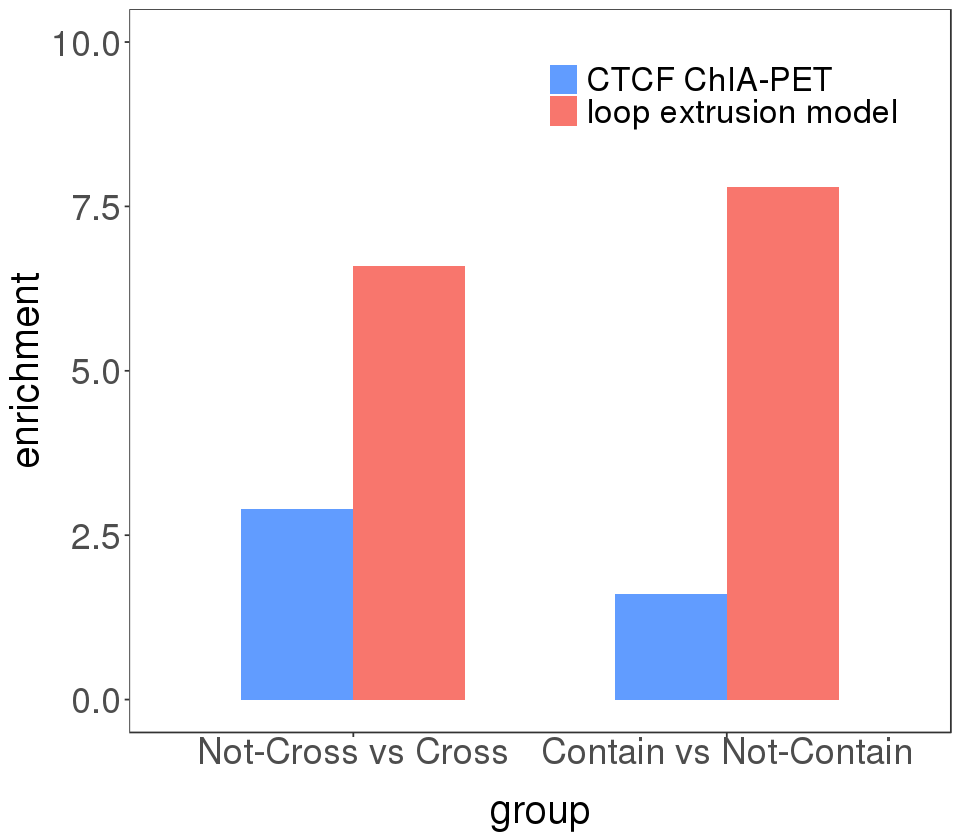

In [23]:
df = data.frame(ratio = c('Not-Cross vs Cross','Not-Cross vs Cross','Contain vs Not-Contain','Contain vs Not-Contain'),
                enrichment = c(2.9,6.6,1.6,7.8),group = c('CTCF ChIA-PET','loop extrusion model','CTCF ChIA-PET','loop extrusion model'))
df$ratio = factor(df$ratio, levels = c('Not-Cross vs Cross','Contain vs Not-Contain'))
options(repr.plot.width=8, repr.plot.height=7)
ggplot(df, aes(x = ratio, y = enrichment, fill = group)) + xlab('group') + ylim(0,10)+
    geom_bar(stat="identity", position=position_dodge(),width=0.6) + My_Theme + scale_fill_manual(values = c("#619cff","#F8766D"))

   
    FALSE TRUE
  0  2690  116
  1  1186   59
  2   138    1

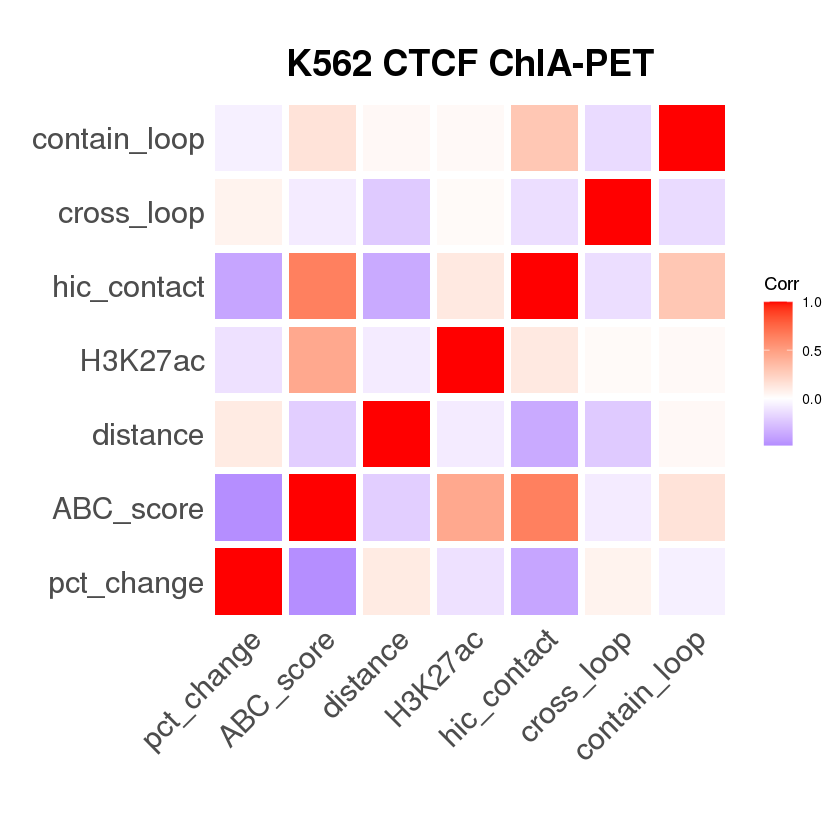

In [3]:
table(df$V4+df$V8,df$V16)
df$pct_change = df$V15
df$ABC_score = df$V21
df$distance = df$V22
df$H3K27ac = df$V24
df$hic_contact = df$V26
df$cross_loop = df$V30
df$contain_loop = df$V32

M = df[,c('pct_change','ABC_score','distance','H3K27ac','hic_contact','cross_loop','contain_loop')]
options(repr.plot.width=7, repr.plot.height=7)
ggplot(melt(cor(M)), aes(Var1, Var2, fill=value)) +
  geom_tile(height=0.9, width=0.9) +
  scale_fill_gradient2(low="blue", mid="white", high="red") +
  theme_minimal() +
  coord_equal() +
  labs(x="",y="",fill="Corr") + ggtitle('K562 CTCF ChIA-PET') +
  theme(axis.text.x=element_text(size=18, angle=45, vjust=1, hjust=1, 
                                 margin=margin(-3,0,0,0)),
        axis.text.y=element_text(size=18, margin=margin(0,-3,0,0)),
        plot.title = element_text(size=22, face="bold",hjust = 0.5),
        panel.grid.major=element_blank()) 

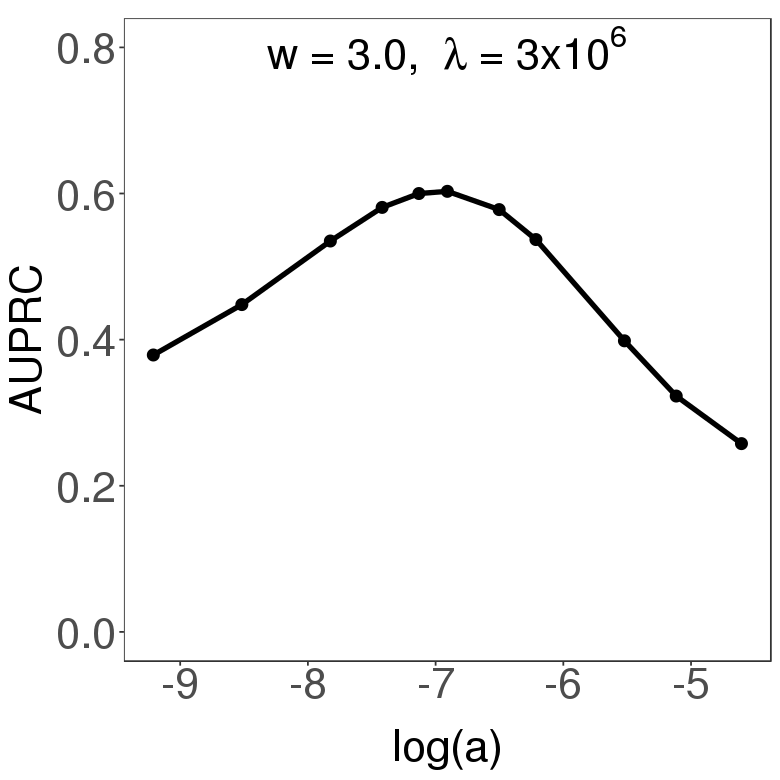

In [8]:
a = log(c(0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.0015,0.002,0.004,0.006,0.01))
auprc = c(0.379,0.448,0.535,0.581,0.600,0.603,0.578,0.537,0.3984,0.3228,0.2577)
df = data.frame(a = a, AUPRC = auprc)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5,margin = margin(t = 10, b = -40)),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 26,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 26),
  plot.caption = element_text(size = 22, vjust = 9),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 14),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
ggplot(df,aes(x=a, y=AUPRC, group=1)) + My_Theme + xlab('log(a)') + ggtitle(expression(paste("w = 3.0,  ",lambda," = 3x",10^6))) +
                      geom_line(size=1.5) + geom_point(size=3) + ylim(0,0.8)
     

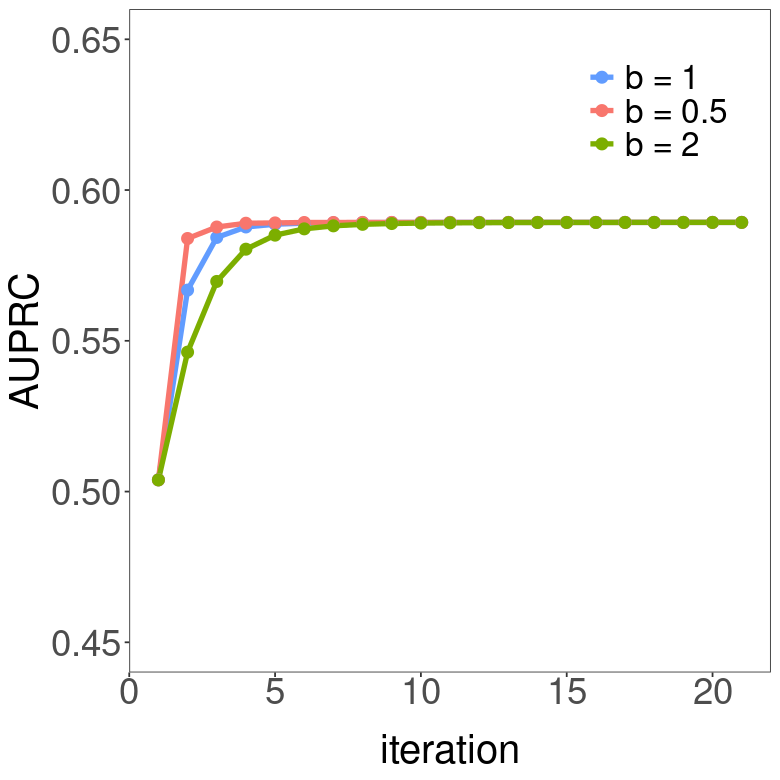

In [27]:
library(reshape2)
library(ggplot2)

df = data.frame(read.csv('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/iteration/AUPRC_lambda.csv',header=T))
df = melt(df,id.var='iteration')

My_Theme = theme_bw()+theme(
  plot.title = element_text(size=24, face="bold",hjust = 0.5),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 22,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 22),
  legend.text = element_text(size = 20),
  legend.position = c(.7, .95),
  legend.justification = c("left", "top"),
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
options(repr.plot.width=6.5, repr.plot.height=6.5)

ggplot(df,aes(x=iteration, y=value, group=variable)) + My_Theme + geom_line(aes(color=variable),size=1.5) + geom_point(aes(color=variable),size=3) + ylim(0.45,0.65) +  
                      scale_color_manual(labels = c("b = 1", "b = 0.5", "b = 2"), values = c("#619cff","#F8766D","#7CAE00")) +
                      xlab('iteration') + ylab('AUPRC')

Using labels as id variables



   labels variable       value
1       0   ratio1 0.064158225
2     1-2   ratio1 0.024900398
3     3-4   ratio1 0.027459954
4     5-6   ratio1 0.017182131
5      7+   ratio1 0.004784689
6       0   ratio2 0.119388730
7     1-2   ratio2 0.026772793
8     3-4   ratio2 0.013404826
9     5-6   ratio2 0.002702703
10     7+   ratio2 0.010526316


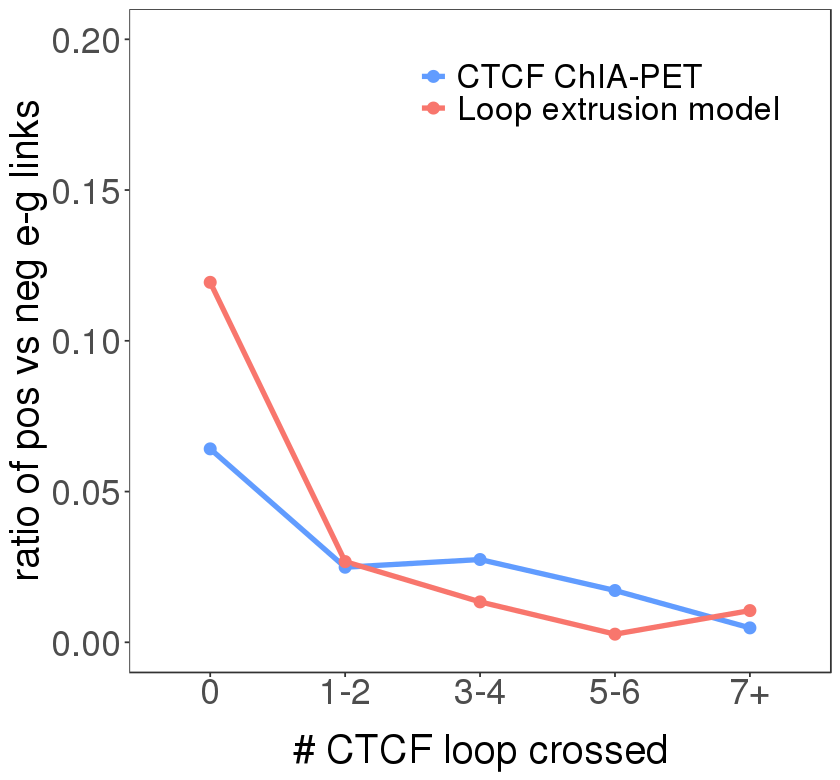

In [48]:
t = table(df$V30,df$V16)
#print(t)
#plot(as.numeric(rownames(t)),t[,2]/t[,1])

a<-df1[df1$V16=='TRUE',]$V30+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,7,14))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df1[df1$V16=='FALSE',]$V30+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,7,14))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio1 = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))    
#print(ratio)
                      
a<-df2[df2$V16=='TRUE',]$V30+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,7,14))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df2[df2$V16=='FALSE',]$V30+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,7,14))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio2 = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq)) 
                      
d = data.frame(labels=c('0','1-2','3-4','5-6','7+'),ratio1=ratio1, ratio2=ratio2)
d$labels = factor(d$labels, level=c('0','1-2','3-4','5-6','7+'))
d = data.frame(melt(d))
print(d)
ggplot(d,aes(x=labels, y=value, group=variable)) + My_Theme + 
                      geom_line(aes(color=variable),size=1.5) + geom_point(aes(color=variable),size=3) + ylim(0,0.2) +  
                      scale_color_manual(labels = c("CTCF ChIA-PET", "Loop extrusion model"), values = c("#619cff","#F8766D")) +
                      xlab('# CTCF loop crossed') + ylab('ratio of pos vs neg e-g links')
                      
#df$cross = df$V30==0
#df$cross[df$V30==0] = 'Not Cross' 
#df$cross[df$V30!=0] = 'Cross'
#table(ctcf_loop = df$cross, eg_link = df$V16)

Using labels as id variables



  labels variable      value
1      0   ratio1 0.03740296
2    1-2   ratio1 0.04127967
3    3-4   ratio1 0.12631579
4    5-8   ratio1 0.28571429
5      0   ratio2 0.02636692
6    1-2   ratio2 0.14204545
7    3-4   ratio2 0.52941176
8    5-8   ratio2 1.00000000


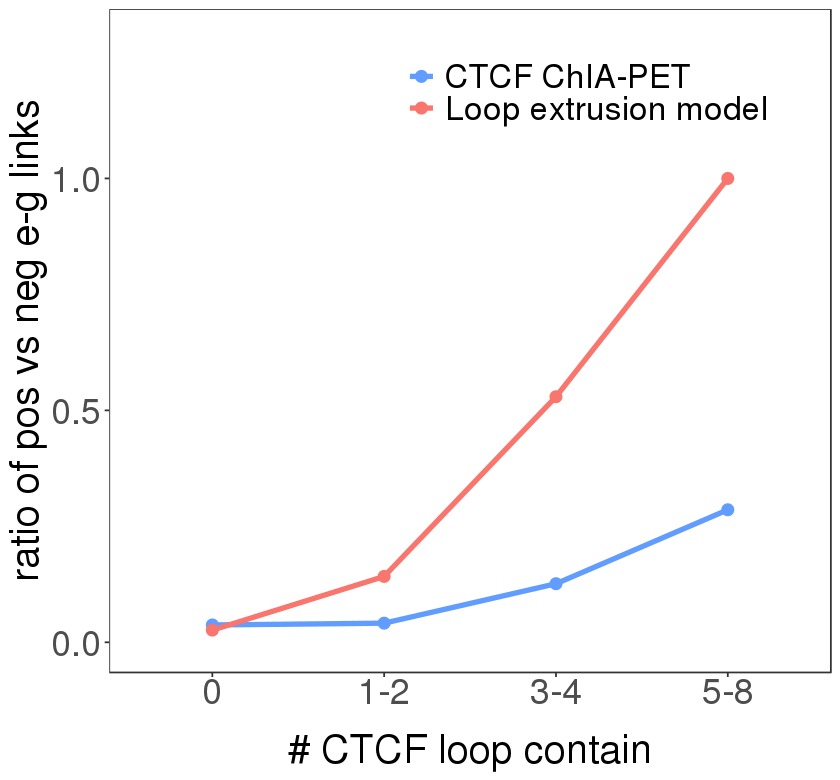

In [53]:
t = table(df$V32,df$V16)
#print(t)
#plot(as.numeric(rownames(t)),t[,2]/t[,1])

a<-df1[df1$V16=='TRUE',]$V32+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,8))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df1[df1$V16=='FALSE',]$V32+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,8))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio1 = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))  

a<-df2[df2$V16=='TRUE',]$V32+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,8))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df2[df2$V16=='FALSE',]$V32+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,8))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio2 = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))  

d = data.frame(labels=c('0','1-2','3-4','5-8'),ratio1=ratio1, ratio2=ratio2)
d$labels = factor(d$labels, level=c('0','1-2','3-4','5-8'))
d = data.frame(melt(d))
print(d)
ggplot(d,aes(x=labels, y=value, group=variable)) + My_Theme + 
                      geom_line(aes(color=variable),size=1.5) + geom_point(aes(color=variable),size=3) + ylim(0,1.3) +  
                      scale_color_manual(labels = c("CTCF ChIA-PET", "Loop extrusion model"), values = c("#619cff","#F8766D")) +
                      xlab('# CTCF loop contain') + ylab('ratio of pos vs neg e-g links')
                      
#df$contain = df$V32==0
#df$contain[df$V32==0] = 'Not Contain' 
#df$contain[df$V32!=0] = 'Contain'
#table(ctcf_loop = df$contain, eg_link = df$V16)
#data.frame(table(ctcf_loop = df$cross, ctcf_loop = df$contain, eg_link = df$V16))

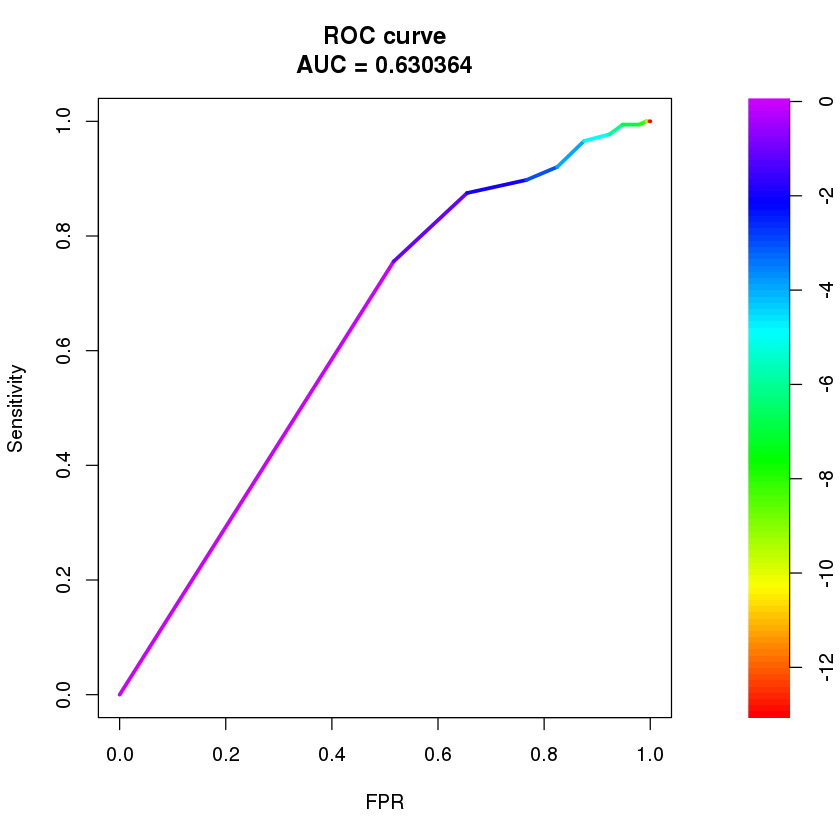

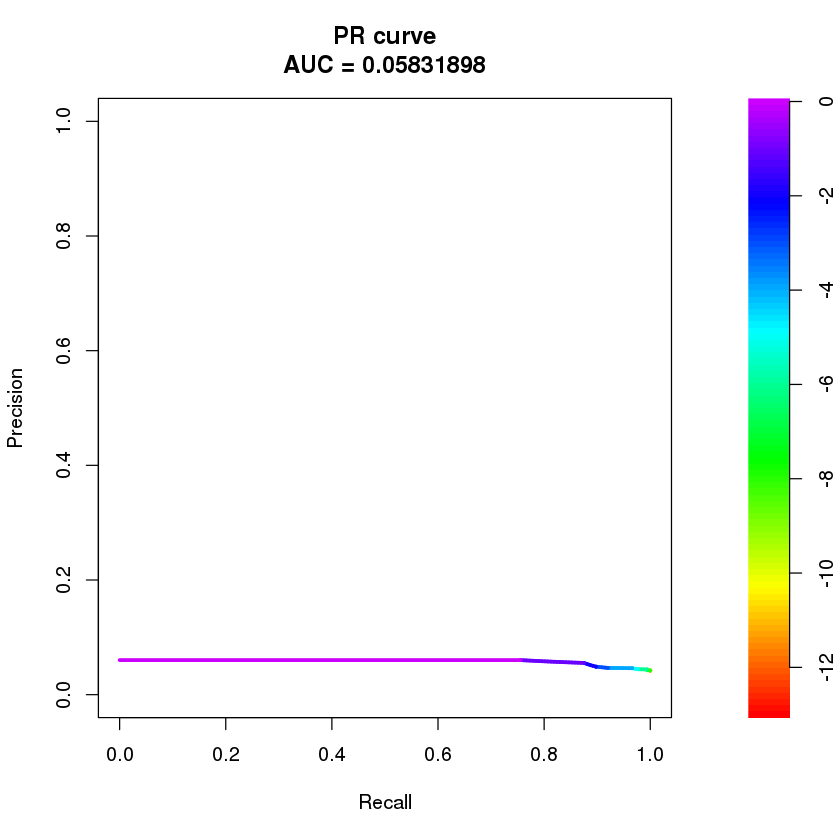

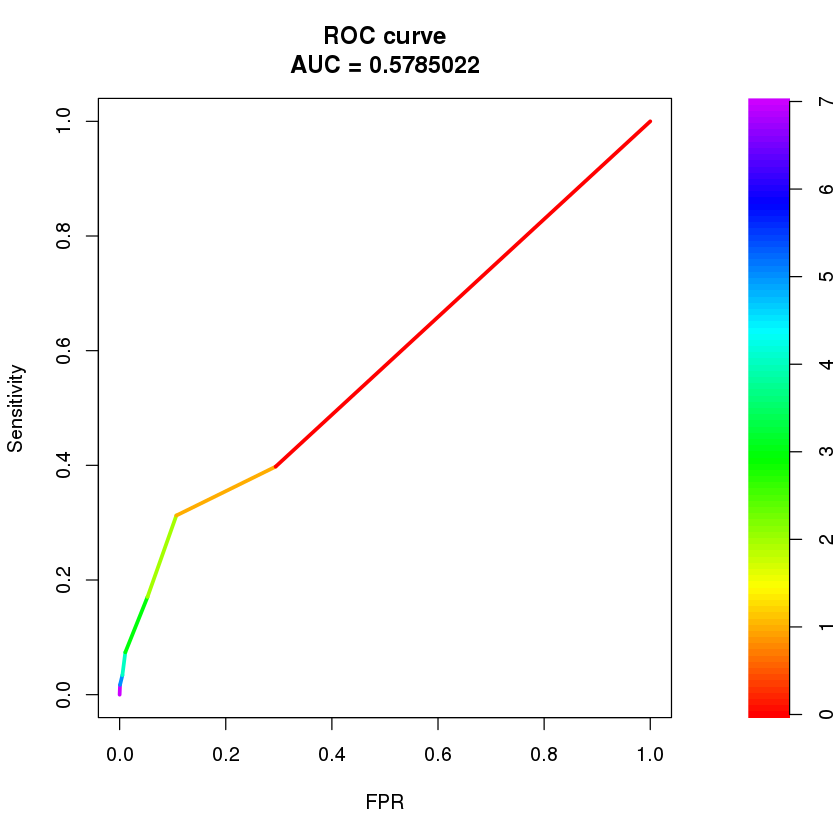

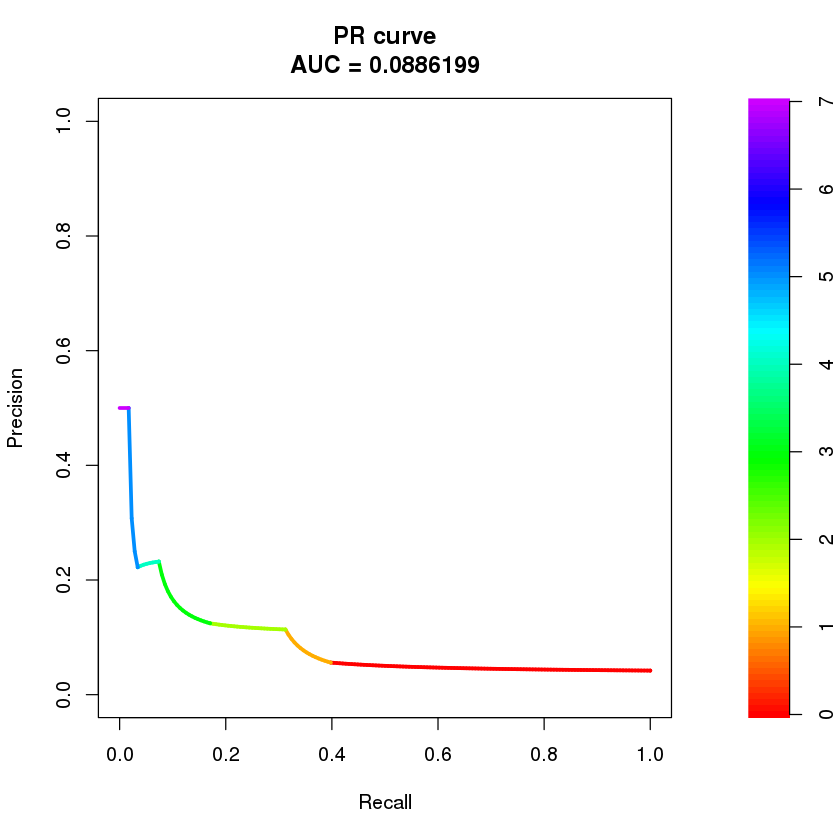

In [6]:
fg <- -df$V30[df$V16 == 'TRUE']
bg <- -df$V30[df$V16 == 'FALSE']

roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

fg <- df$V32[df$V16 == 'TRUE']
bg <- df$V32[df$V16 == 'FALSE']

roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

In [8]:
t = table(df$V31,df$V16)
#print(t)
#plot(as.numeric(rownames(t)),t[,2]/t[,1])


a<-df[df$V16=='TRUE',]$V31+0.01
a1<-melt(table(cut(a,breaks=c(0,2,5,10,15,20,30,40,100))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df[df$V16=='FALSE',]$V31+0.01
b1<-melt(table(cut(b,breaks=c(0,2,5,10,15,20,30,40,100))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))    

d = data.frame(labels=c('0','2-4','5-9','10-14','15-19','20-29','30-39','40+'),ratio=ratio)
d$labels = factor(d$labels, level=c('0','2-4','5-9','10-14','15-19','20-29','30-39','40+'))
#print(d)
#ggplot(d,aes(x=labels,y=ratio, group=1)) + geom_line() + geom_point() + ylim(0,0.1) + ggtitle('K562 CTCF ChIA-PET') + 
#                      xlab('# CTCF loop contain') + ylab('ratio of pos/neg e-g links')

In [9]:
df = data.frame(read.table('predictions.annotated.K562.CTCF_LE0.174.sorted'))
df = df[df$V28==0,]
#print(df[1:2,])
#print(dim(df))

   
    FALSE TRUE
  0  2690  116
  1  1186   61
  2   137    2

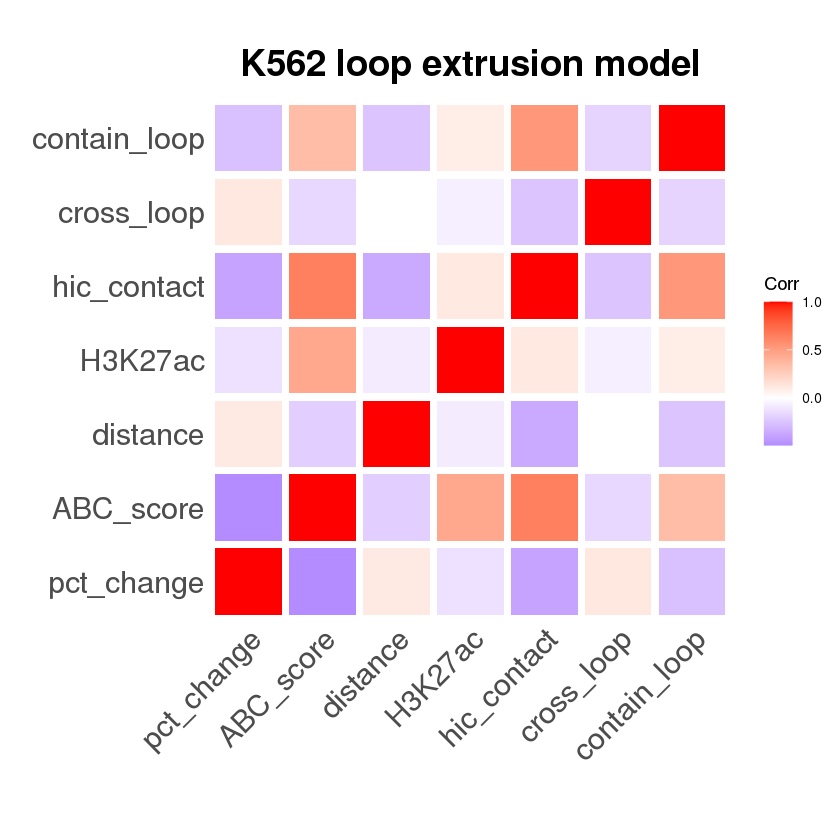

In [9]:
table(df$V4+df$V8,df$V16)
df$pct_change = df$V15
df$ABC_score = df$V21
df$distance = df$V22
df$H3K27ac = df$V24
df$hic_contact = df$V26
df$cross_loop = df$V30
df$contain_loop = df$V32

M = df[,c('pct_change','ABC_score','distance','H3K27ac','hic_contact','cross_loop','contain_loop')]
options(repr.plot.width=7, repr.plot.height=7)
ggplot(melt(cor(M)), aes(Var1, Var2, fill=value)) +
  geom_tile(height=0.9, width=0.9) +
  scale_fill_gradient2(low="blue", mid="white", high="red") +
  theme_minimal() +
  coord_equal() +
  labs(x="",y="",fill="Corr") + ggtitle('K562 loop extrusion model') +
  theme(axis.text.x=element_text(size=18, angle=45, vjust=1, hjust=1, 
                                 margin=margin(-3,0,0,0)),
        axis.text.y=element_text(size=18, margin=margin(0,-3,0,0)),
        plot.title = element_text(size=22, face="bold",hjust = 0.5),
        panel.grid.major=element_blank()) 

    
     FALSE TRUE
  0   1047  125
  1    815   19
  2    567   18
  3    758   12
  4    361    3
  5    212    0
  6    158    1
  7     52    0
  8     25    0
  9     12    0
  10     6    1
  labels       ratio
1      0 0.119388730
2    1-2 0.026772793
3    3-4 0.013404826
4    5-6 0.002702703
5     7+ 0.010526316


           eg_link
ctcf_loop   FALSE TRUE
  Cross      2966   54
  Not Cross  1047  125

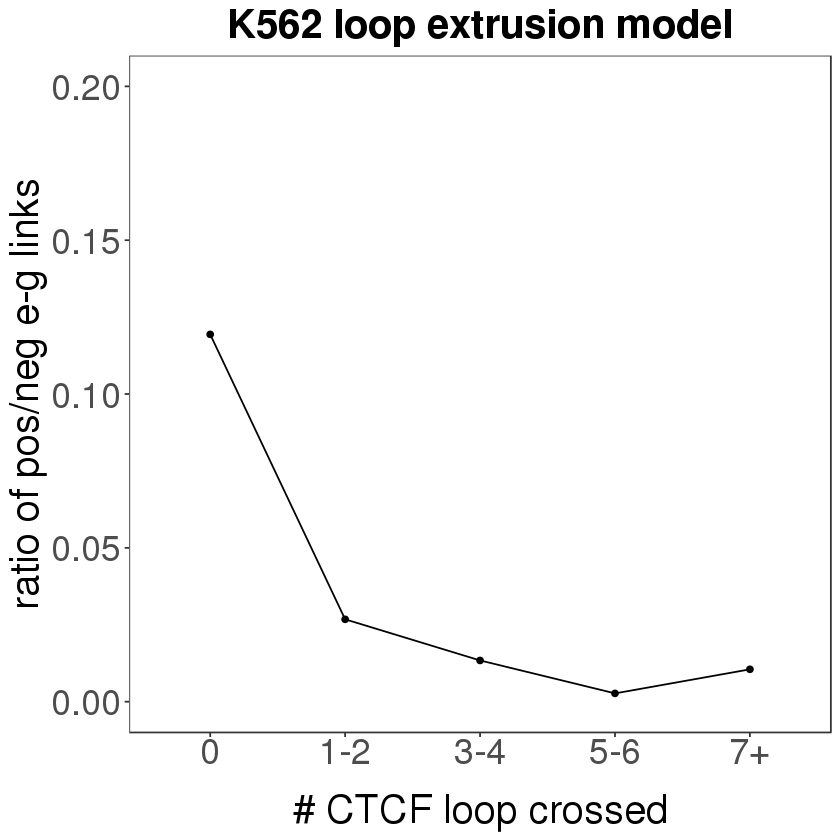

In [10]:
t = table(df$V30,df$V16)
print(t)
#plot(as.numeric(rownames(t)),t[,2]/t[,1])

a<-df[df$V16=='TRUE',]$V30+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,7,14))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df[df$V16=='FALSE',]$V30+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,7,14))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))    
#print(ratio)
                      
d = data.frame(labels=c('0','1-2','3-4','5-6','7+'),ratio=ratio)
d$labels = factor(d$labels, level=c('0','1-2','3-4','5-6','7+'))
print(d)
ggplot(d,aes(x=labels,y=ratio, group=1)) + My_Theme + 
                      geom_line() + geom_point() + ylim(0,0.2) + ggtitle('K562 loop extrusion model') + 
                      xlab('# CTCF loop crossed') + ylab('ratio of pos/neg e-g links')
                      
df$cross = df$V30==0
df$cross[df$V30==0] = 'Not Cross' 
df$cross[df$V30!=0] = 'Cross'
table(ctcf_loop = df$cross, eg_link = df$V16)

  labels      ratio
1      0 0.02636692
2    1-2 0.14204545
3    3-4 0.52941176
4    5-8 1.00000000


             eg_link
ctcf_loop     FALSE TRUE
  Contain       410   84
  Not Contain  3603   95

ctcf_loop,ctcf_loop.1,eg_link,Freq
<fct>,<fct>,<fct>,<int>
Cross,Contain,FALSE,210
Not Cross,Contain,FALSE,200
Cross,Not Contain,FALSE,2756
Not Cross,Not Contain,FALSE,847
Cross,Contain,TRUE,16
Not Cross,Contain,TRUE,68
Cross,Not Contain,TRUE,38
Not Cross,Not Contain,TRUE,57


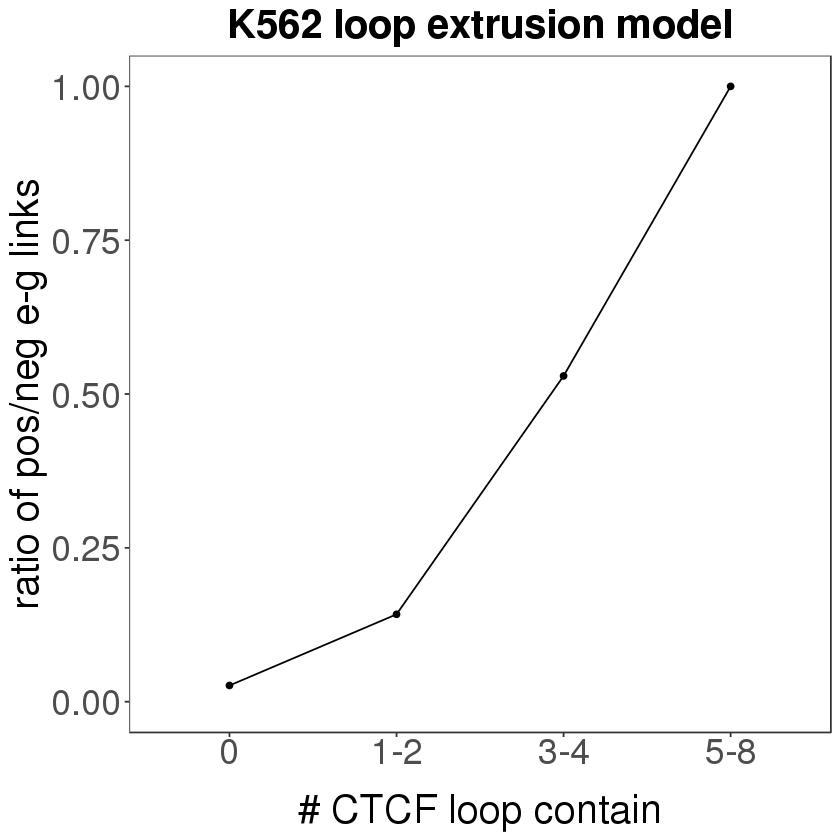

In [11]:
t = table(df$V32,df$V16)
#print(t)
#plot(as.numeric(rownames(t)),t[,2]/t[,1])

a<-df[df$V16=='TRUE',]$V32+0.01
a1<-melt(table(cut(a,breaks=c(0,1,3,5,9))))
a2<-data.frame(sapply(a1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(a2)<-c("numbers","Freq")
#print(a2)
                      
b<-df[df$V16=='FALSE',]$V32+0.01
b1<-melt(table(cut(b,breaks=c(0,1,3,5,9))))
b2<-data.frame(sapply(b1,function(x) gsub("\\(|\\]","",gsub("\\,","-",x))))
colnames(b2)<-c("numbers","Freq")
#print(b2)
ratio = as.numeric(as.character(a2$Freq))/as.numeric(as.character(b2$Freq))    
#print(ratio)
d = data.frame(labels=c('0','1-2','3-4','5-8'),ratio=ratio)
d$labels = factor(d$labels, level=c('0','1-2','3-4','5-8'))
print(d)
ggplot(d,aes(x=labels,y=ratio, group=1)) + My_Theme +
                      geom_line() + geom_point() + ylim(0,1) + ggtitle('K562 loop extrusion model') + 
                      xlab('# CTCF loop contain') + ylab('ratio of pos/neg e-g links')
                      
df$contain = df$V32==0
df$contain[df$V32==0] = 'Not Contain' 
df$contain[df$V32!=0] = 'Contain'
table(ctcf_loop = df$contain, eg_link = df$V16)
data.frame(table(ctcf_loop = df$cross, ctcf_loop = df$contain, eg_link = df$V16))


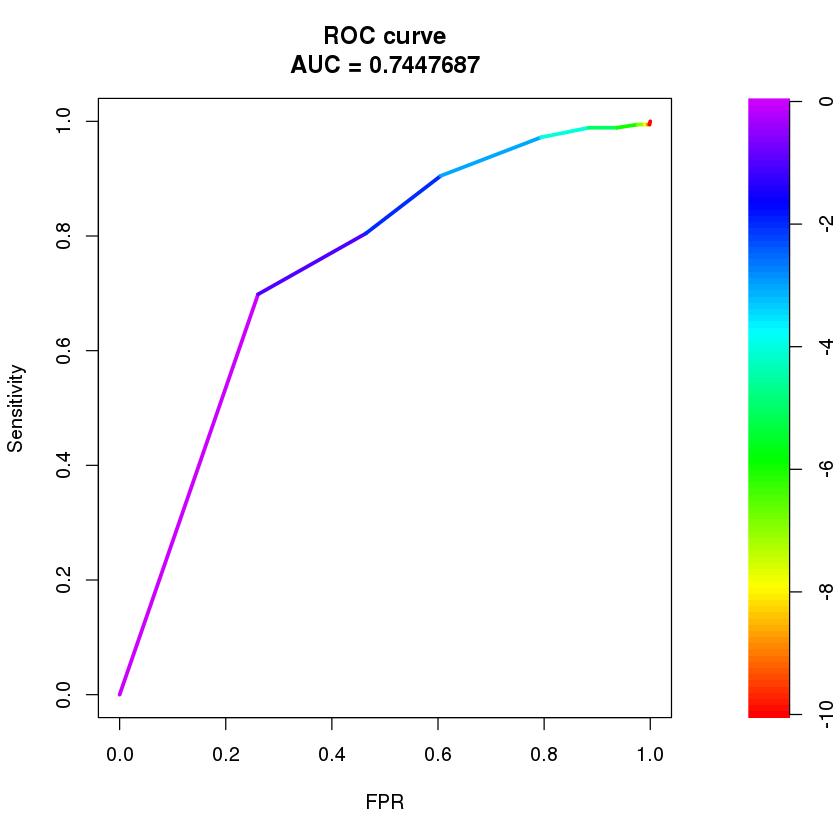

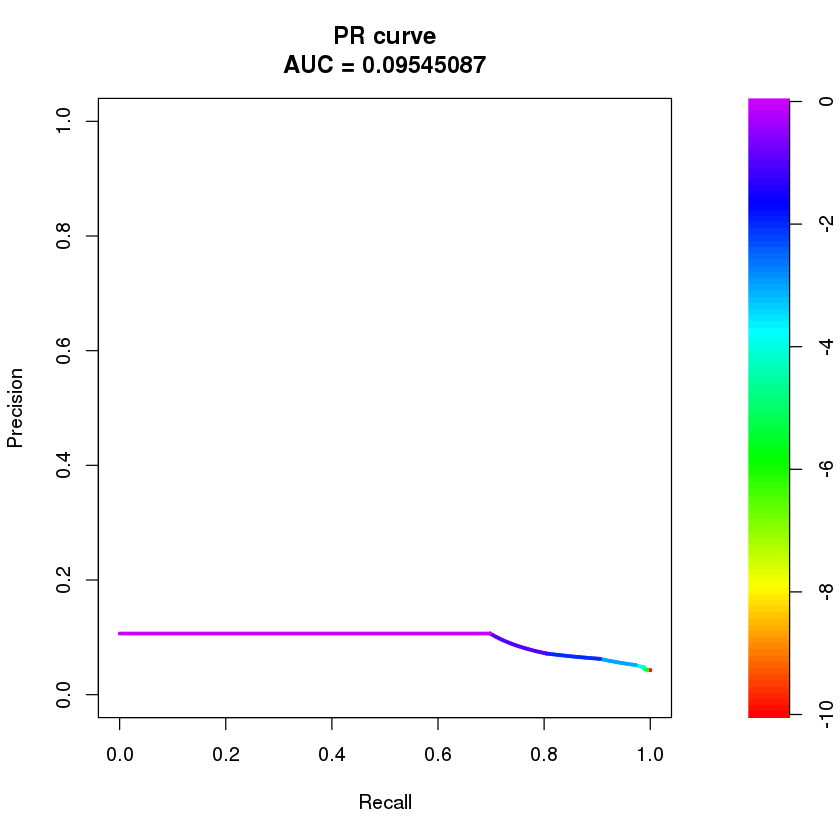

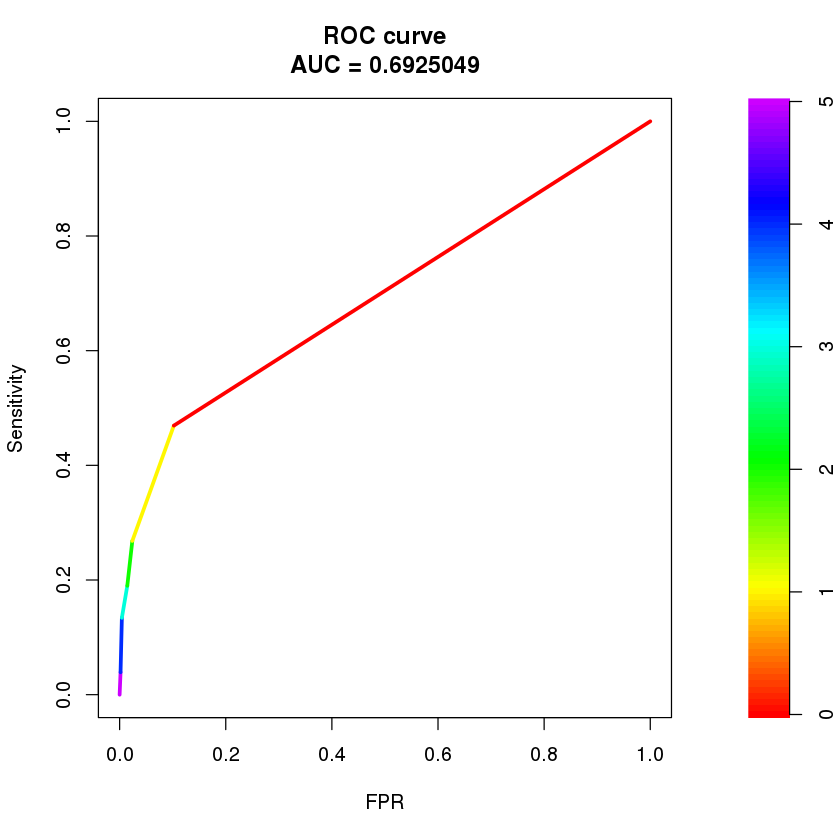

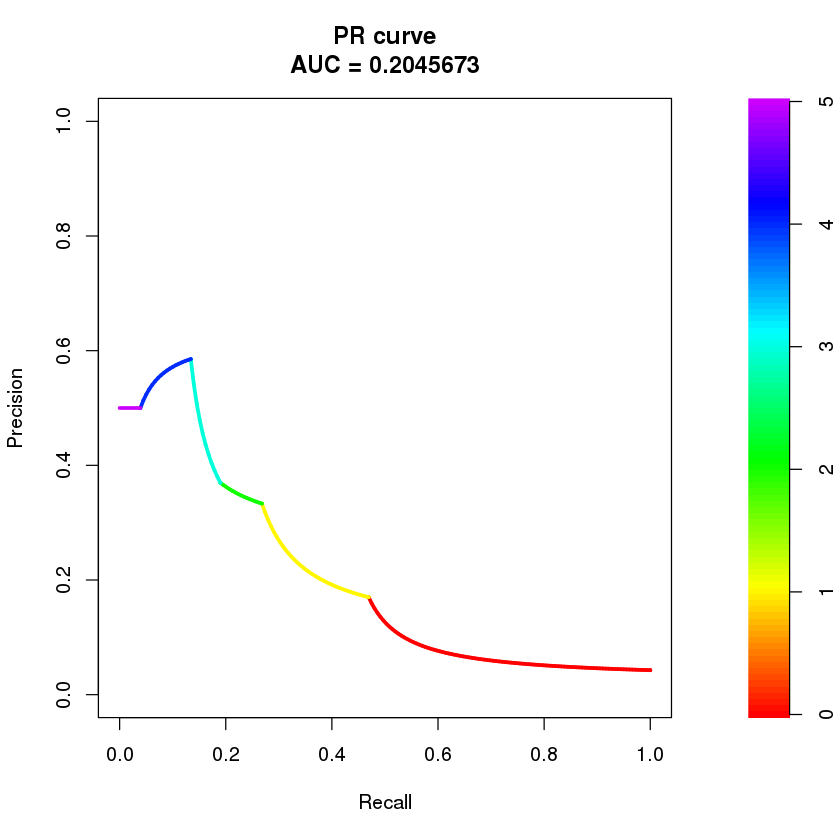

In [12]:
fg <- -df$V30[df$V16 == 'TRUE']
bg <- -df$V30[df$V16 == 'FALSE']

roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

fg <- df$V32[df$V16 == 'TRUE']
bg <- df$V32[df$V16 == 'FALSE']

roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)